# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: punta arenas
City NOT found: taiohae
City processed: bilibino
City processed: elbistan
City processed: sur
City NOT found: antsohimbondrona
City processed: bredasdorp
City processed: kerben
City processed: ar rutbah
City processed: holualoa
City processed: colonia
City processed: lazaro cardenas
City processed: port elizabeth
City processed: hilo
City processed: wailua homesteads
City processed: palikir - national government center
City processed: ndele
City processed: levuka
City processed: adamstown
City processed: madera
City processed: rio do sul
City processed: shingu
City processed: ebon
City processed: grytviken
City processed: puerto natales
City processed: afif
City processed: puerto ayora
City processed: namdrik
City processed: angaur state
City processed: ghadamis
City processed: port-aux-francais
City processed: plastun
City processed: haiku-pauwela
City processed: sodra sandby
City processed: ostrov
City processed: bethel
City processed: hithadhoo
City proc

City processed: szentlorinc
City processed: udachny
City processed: wagar
City processed: san agustin acasaguastlan
City processed: bodden town
City processed: rio grande
City processed: college
City processed: basse-terre
City processed: santa marta
City processed: qazigund
City processed: chibougamau
City processed: norfolk
City processed: niafunke
City processed: myory
City processed: ubinskoye
City processed: jatiroto
City processed: daru
City processed: marsh harbour
City processed: cidreira
City processed: saint-pierre
City processed: kingaroy
City processed: itamaraca
City processed: namsos
City processed: ujae
City processed: san fernando
City processed: remire-montjoly
City processed: les avirons
City processed: as sulayyil
City processed: ataq
City processed: suva
City processed: florence
City processed: la tijera
City processed: coyhaique
City processed: eyl
City processed: novoishimskiy
City processed: stuttgart
City processed: saynshand
City processed: hassi messaoud
City 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

# Show Record Count
city_data_df.count()

City           567
Country        567
Temperature    567
Humidity       567
Cloudiness     567
Windspeed      567
Latitude       567
Longitude      567
Date           567
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,punta arenas,CL,41.11,70,75,18.41,-53.1500,-70.9167,1687027278
1,bilibino,RU,41.85,66,100,6.80,68.0546,166.4372,1687027370
2,elbistan,TR,69.67,54,0,5.95,38.2059,37.1983,1687027753
3,sur,OM,87.75,66,74,8.32,22.5667,59.5289,1687027372
4,bredasdorp,ZA,52.68,75,0,9.98,-34.5322,20.0403,1687027367


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,punta arenas,CL,41.11,70,75,18.41,-53.1500,-70.9167,1687027278
1,bilibino,RU,41.85,66,100,6.80,68.0546,166.4372,1687027370
2,elbistan,TR,69.67,54,0,5.95,38.2059,37.1983,1687027753
3,sur,OM,87.75,66,74,8.32,22.5667,59.5289,1687027372
4,bredasdorp,ZA,52.68,75,0,9.98,-34.5322,20.0403,1687027367


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

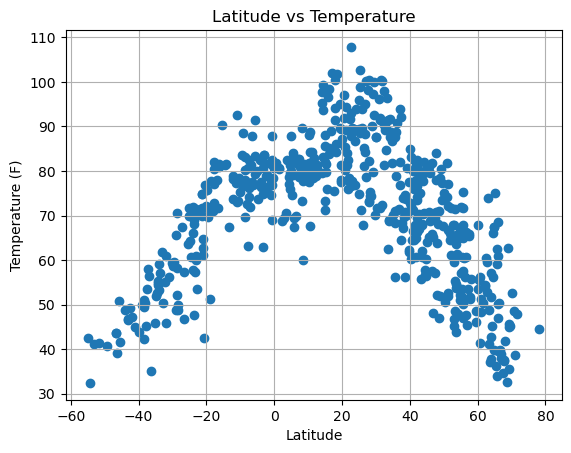

<Figure size 640x480 with 0 Axes>

In [38]:
# Build scatter plot for latitude vs. temperature
#set data to plot
x = city_data_df["Latitude"]
y = city_data_df["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

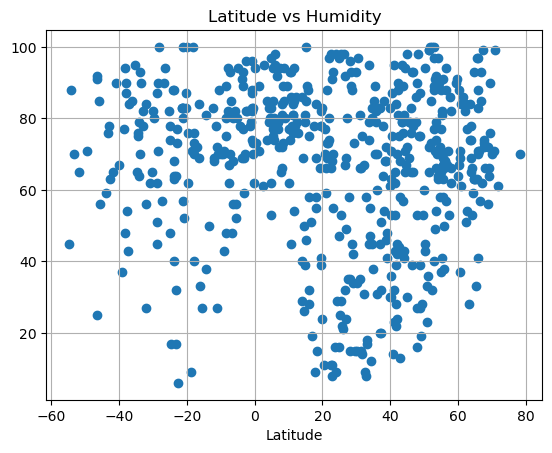

In [39]:
# Build the scatter plots for latitude vs. humidity
h = city_data_df["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity")
plt.grid()
plt.xlabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

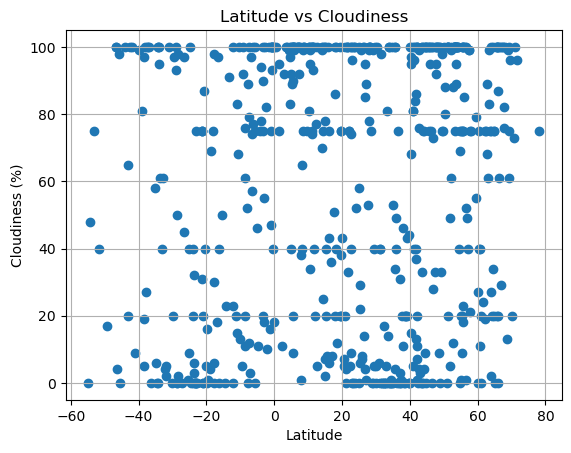

In [41]:
# Build the scatter plots for latitude vs. cloudiness
c = city_data_df["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

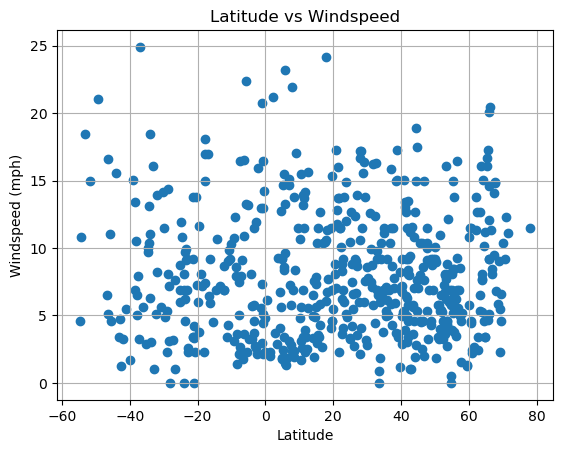

In [42]:
# Build the scatter plots for latitude vs. wind speed
ws = city_data_df["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] > 0]
# Display sample data
northern_hemi_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
1,bilibino,RU,41.85,66,100,6.80,68.0546,166.4372,1687027370
2,elbistan,TR,69.67,54,0,5.95,38.2059,37.1983,1687027753
3,sur,OM,87.75,66,74,8.32,22.5667,59.5289,1687027372
5,kerben,KG,77.50,30,97,2.86,40.2951,72.1863,1687027753
6,ar rutbah,IQ,89.65,18,5,9.80,33.0381,40.2848,1687027753


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,punta arenas,CL,41.11,70,75,18.41,-53.1500,-70.9167,1687027278
4,bredasdorp,ZA,52.68,75,0,9.98,-34.5322,20.0403,1687027367
10,port elizabeth,ZA,59.09,93,100,18.41,-33.9180,25.5701,1687027368
16,adamstown,PN,71.78,74,9,8.72,-25.0660,-130.1015,1687027368
18,rio do sul,BR,67.39,57,0,3.20,-27.2142,-49.6431,1687027754


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.7216714912614396
y = -0.58x + 93.61


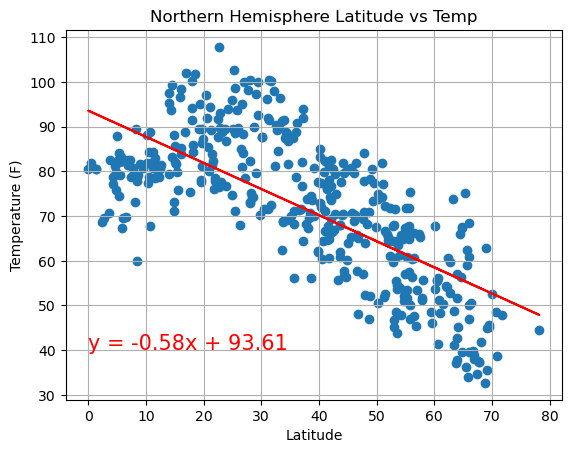

In [51]:
# Linear regression on Northern Hemisphere
#set the data sets to compare
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.8697385471804157
y = 0.86x + 84.26


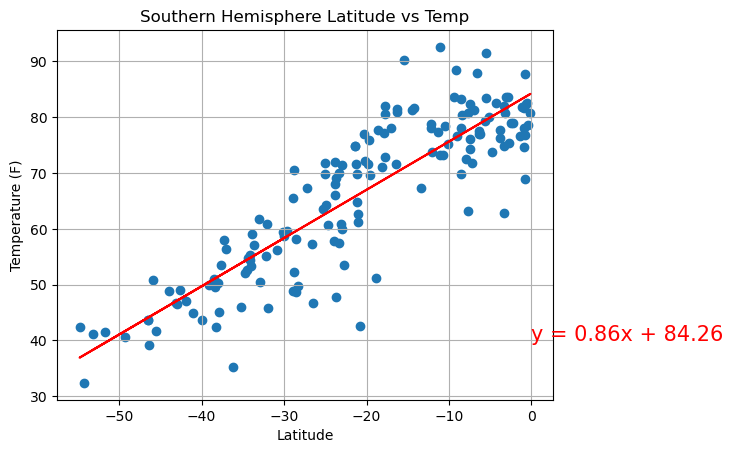

In [52]:
# Linear regression on Northern Hemisphere
#set the data sets to compare
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-square is -0.008455569059313859
y = -0.01x + 65.7


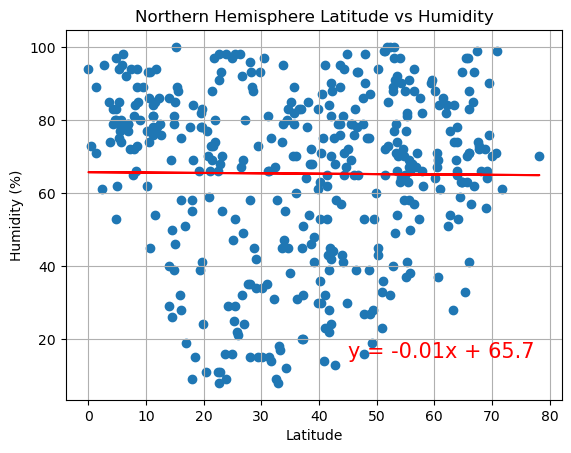

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.09246984574556054
y = 0.12x + 73.41


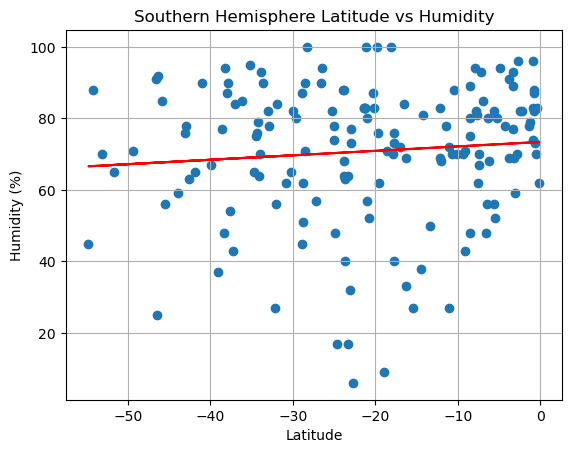

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [56]:
#The northern hemisphere has a negative correlation between latitude and humidity. This tells us the further north you
#go on the globe the lower the humidity gets

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is -0.03073369047631616
y = -0.06x + 62.89


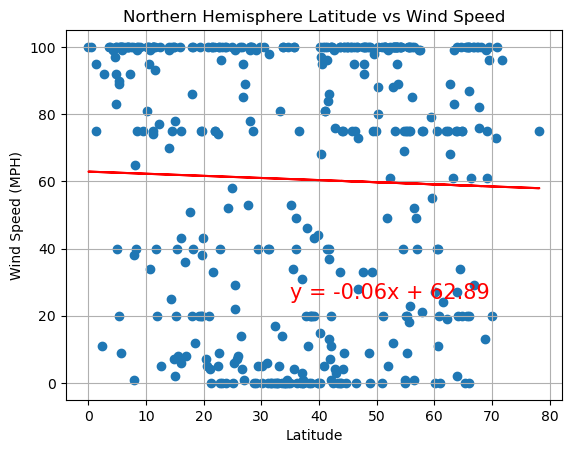

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.08684385466220529
y = 0.24x + 54.35


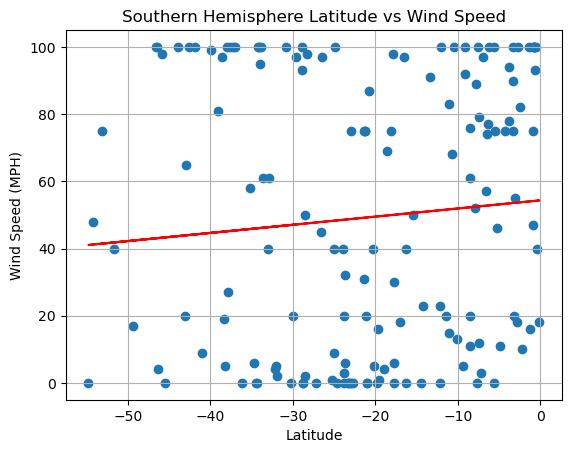

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.012677756641889469
y = 0.0x + 7.81


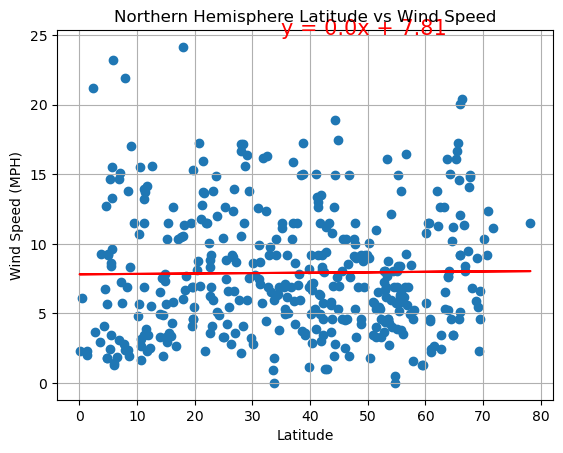

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is -0.08366329781210073
y = -0.03x + 7.37


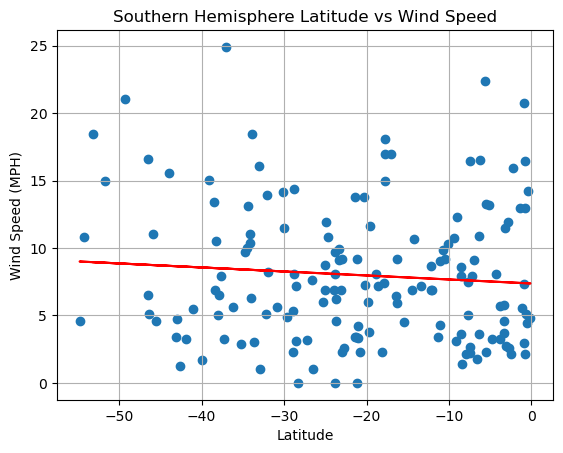

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE